# Machine learning for intelligent transportation systems




In [1]:
#Semester: 2021-2022/II.
#Coordinator: Simon Vilmos PhD
#Teacher: Mohammad Bawaneh

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formarch/HourlyVol.csv
/kaggle/input/hourlydata/HourlyVol.csv


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [4]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
import seaborn as sns

In [5]:
#occupancies_30=pd.read_csv('../input/gettraf-data/30sec_occ.csv',index_col='time')

#speeds_30=pd.read_csv('../input/gettraf-data/30sec_speeds.csv')

#volums_30=pd.read_csv('../input/gettraf-data/30sec_volumes.csv')

#DailyVols=pd.read_csv('../input/gettraf-data/DailyVol.csv')

HourlyVols=pd.read_csv('../input/hourlydata/HourlyVol.csv',parse_dates=[['date', 'hour']])

#hourly_AvgSpeed=pd.read_csv('../input/gettraf-data/hourly_AvgSpeeds.csv')

#hourly_SpeedBins=pd.read_csv('../input/gettraf-data/hourly_SpeedBins.csv')


# Data Cleaning and Preprocessing

In [6]:
#occupancies_30
#HourlyVols

In [7]:
#sns.heatmap(HourlyVols.corr())

In [8]:
#occupancies_30.info()
#HourlyVols.info()


In [9]:
#occupancies_30.isnull()
#HourlyVols.isnull()

In [10]:
#occupancies_30.isna().sum()
#HourlyVols.isna().sum()


In [11]:
#occupancies_30['sensor6908']=occupancies_30['sensor6908'].replace(-1,None)
HourlyVols['TotalVol']=HourlyVols['Total Vol'].replace(-1,np.nan)



In [12]:
#occupancies_30.isna().sum()
#HourlyVols.isna().sum()

In [13]:
HourlyVols=HourlyVols.ffill()
HourlyVols=HourlyVols.bfill()



In [14]:
HourlyVols['date_hour'] = pd.to_datetime(HourlyVols['date_hour'], format='%m/%d/%Y  %H')

In [15]:
HourlyVols['date_hour']=pd.DataFrame(HourlyVols['date_hour'])

In [16]:
HourlyVols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_hour  744 non-null    datetime64[ns]
 1   6908       744 non-null    int64         
 2   6909       744 non-null    int64         
 3   Total Vol  744 non-null    int64         
 4   6908-mis%  744 non-null    float64       
 5   6909-mis%  744 non-null    float64       
 6   TotalVol   744 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 40.8 KB


In [17]:
HourlyVols=HourlyVols.set_index('date_hour')

In [18]:
#print(-1 in dataframe['sensor6908'].unique())
print(-1 in HourlyVols['TotalVol'].unique())


False


<AxesSubplot:xlabel='date_hour'>

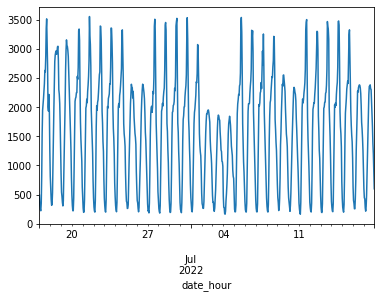

In [19]:
#plt.figure(figsize=(30,15))
HourlyVols['TotalVol'].plot()
#plt.plot(HourlyVols["TotalVol"])

In [20]:
#import plotly.express as px
#fig = px.line(s) #s[1:200]
#fig.show()
##s = pd.Series(HourlyVols.TotalVol) #s

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing,Holt

In [22]:
#smothing=s [1:200]     ;#[1:100]
#smothing

In [23]:
HourlyVols

,6908,6909,Total Vol,6908-mis%,6909-mis%,TotalVol
date_hour,,,,,,
2022-06-17 00:00:00,204,287,491,0.0,0.0,491
2022-06-17 01:00:00,139,174,313,0.0,0.0,313
2022-06-17 02:00:00,116,130,246,0.0,0.0,246
2022-06-17 03:00:00,105,119,224,0.0,0.0,224
2022-06-17 04:00:00,170,186,356,0.0,0.0,356
...,...,...,...,...,...,...
2022-07-17 19:00:00,645,1024,1669,0.0,0.0,1669
2022-07-17 20:00:00,450,929,1379,0.0,0.0,1379
2022-07-17 21:00:00,366,836,1202,0.0,0.0,1202


In [24]:
HourlyVols = HourlyVols['TotalVol']
HourlyVols=pd.DataFrame(HourlyVols)

In [25]:
HourlyVols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2022-06-17 00:00:00 to 2022-07-17 23:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TotalVol  744 non-null    int64
dtypes: int64(1)
memory usage: 11.6 KB


In [26]:
Simple_fit1 = SimpleExpSmoothing(HourlyVols).fit(smoothing_level=0.2,optimized=False)
Simple_fit2 = SimpleExpSmoothing(HourlyVols).fit(smoothing_level=0.8,optimized=False)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

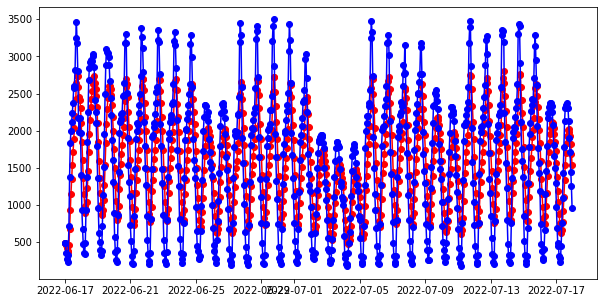

In [27]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)

plt.plot(Simple_fit1.fittedvalues,marker='o',color='red')
plt.plot(Simple_fit2.fittedvalues,marker='o',color='blue')

In [28]:
HourlyVols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2022-06-17 00:00:00 to 2022-07-17 23:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   TotalVol  744 non-null    int64
dtypes: int64(1)
memory usage: 11.6 KB


CNN

In [29]:
df_1=HourlyVols.values
df_1=df_1.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_1)

In [30]:
timestep = 5

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 425
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

In [31]:
Xtest = X[k:,:,:]  
Ytest= Y[k:] 

In [32]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit
#model.fit(Xtrain, Ytrain, epochs=20, verbose=0) 

2022-10-31 22:45:02.720303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 22:45:02.808481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 22:45:02.809294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-31 22:45:02.810551: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [33]:
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
patience =500)

In [34]:
history = model.fit(Xtrain, Ytrain,validation_data=(Xtest, Ytest), epochs = 100,
 shuffle = False,
callbacks = [early_stop])

2022-10-31 22:45:05.820693: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-31 22:45:07.114703: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


14/14 [==============================] - 7s 44ms/step - loss: 0.1773 - val_loss: 0.0665
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0486 - val_loss: 0.1377
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0619 - val_loss: 0.0387
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0378 - val_loss: 0.0556
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0463 - val_loss: 0.0368
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0262 - val_loss: 0.0324
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0268 - val_loss: 0.0334
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0302 - val_loss: 0.0258
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0231 - val_loss: 0.0210
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0180
Epoch 11/100
14/14 [

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 128)            384       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 128)            32896     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 128)            32896     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               12900     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

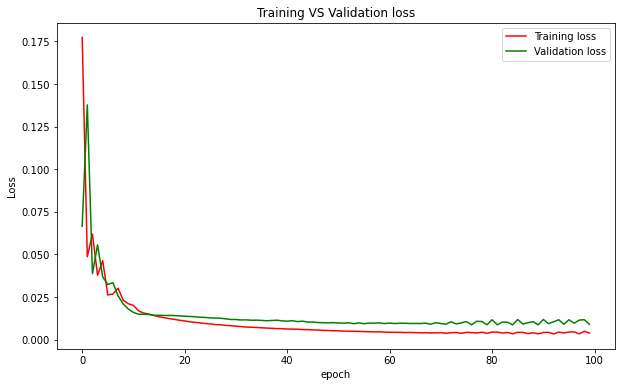

In [36]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'],'r', label='Training loss')
plt.plot(history.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [37]:
#hist=model.fit(Xtrain, Ytrain, epochs=20, verbose=0) 

In [38]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [39]:
preds = model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)



25742.4

In [40]:
100-100*mean_squared_error(Ytest,preds)/np.sum(Ytest)

94.90419021184536

In [41]:
mean_absolute_error(Ytest,preds)

107.16013

In [42]:
mean_squared_log_error(Ytest,preds)

0.012332392

In [43]:
RMSE=np.sqrt(mean_squared_error(Ytest,preds))
#RMSE
print(RMSE)

160.44438


In [44]:
from sklearn.metrics import mean_absolute_percentage_error

In [45]:
mean_absolute_percentage_error(Ytest,preds)

0.08334247

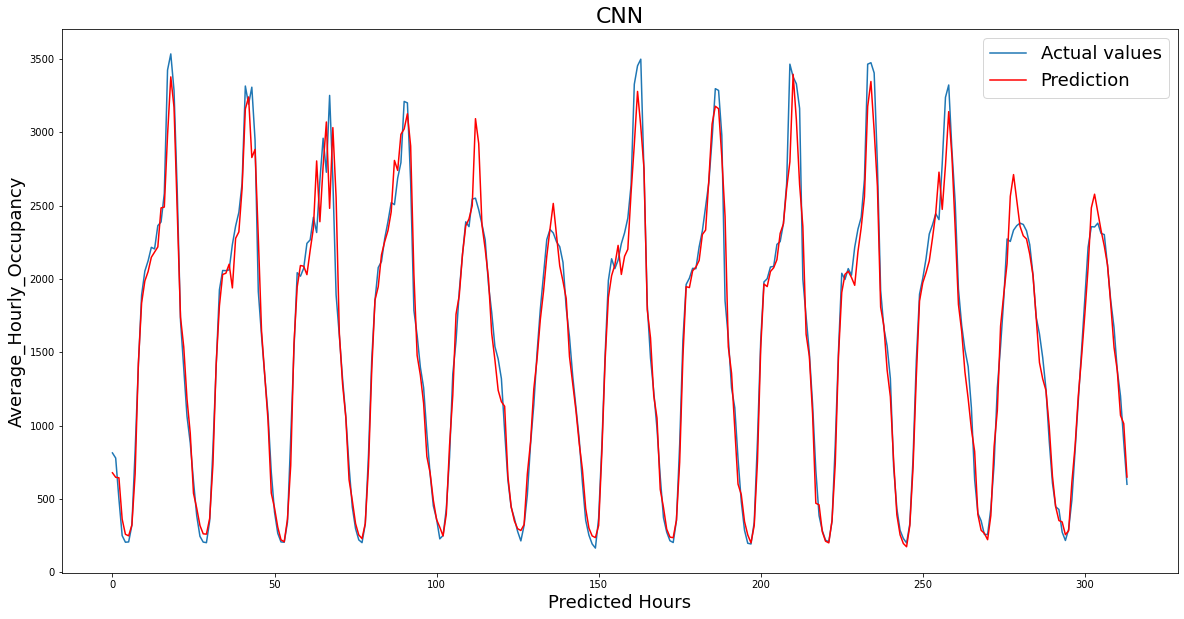

In [46]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds, 'r',label ='Prediction')
pyplot.legend(fontsize = 18)
plt.xlabel('Predicted Hours', fontsize = 18)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 18)
plt.title('CNN', fontsize = 22)
pyplot.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


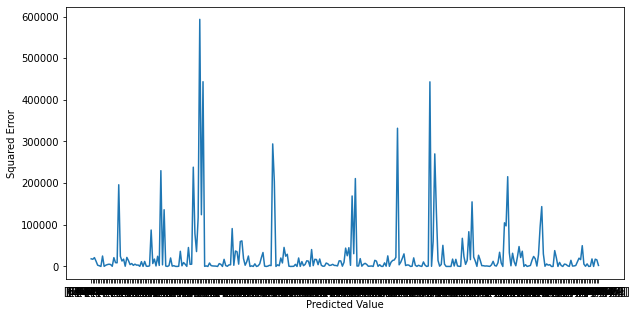

In [47]:

expected = Ytest
# predicted value
predicted =preds
# calculate errors
errors = list()
for i in range(len(expected)):
    err = (expected[i] - predicted[i])**2
    errors.append(err)
pyplot.figure(figsize=(10,5))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Squared Error')
pyplot.show()

LSTM

In [48]:
df_2=HourlyVols.values
df_2=df_2.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_2)

In [49]:
timestep = 5

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 425
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

In [50]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [51]:
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

In [52]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(5,1)))
model_lstm.add(Dense(1))  
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [53]:
# model_lstm.fit(Xtrain, Ytrain, epochs=200, verbose=0) 

In [54]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
patience = 500)


In [55]:
history = model_lstm.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest),epochs = 100,
 shuffle = False,
callbacks = [early_stop])


Epoch 1/100
14/14 [==============================] - 1s 25ms/step - loss: 0.3344 - val_loss: 0.2969
Epoch 2/100
14/14 [==============================] - 0s 13ms/step - loss: 0.2692 - val_loss: 0.2458
Epoch 3/100
14/14 [==============================] - 0s 13ms/step - loss: 0.2217 - val_loss: 0.2032
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 0.1810 - val_loss: 0.1674
Epoch 5/100
14/14 [==============================] - 0s 14ms/step - loss: 0.1473 - val_loss: 0.1377
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 0.1222 - val_loss: 0.1172
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 0.1057 - val_loss: 0.0999
Epoch 8/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0891 - val_loss: 0.0800
Epoch 9/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0698 - val_loss: 0.0577
Epoch 10/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0505 - val_loss: 0.0436

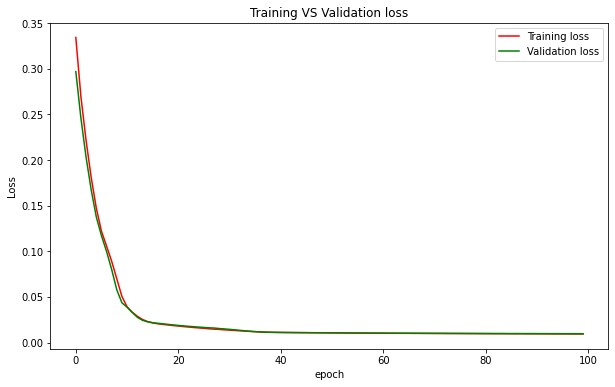

In [56]:

plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'],'r', label='Training loss')
plt.plot(history.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [57]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [58]:
preds2 = model_lstm.predict(Xtest)
preds2 = scaler.inverse_transform(preds2)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds2)


27697.92

In [59]:
100-100*mean_squared_error(Ytest,preds2)/np.sum(Ytest)

94.51708740025596

In [60]:
mean_absolute_error(Ytest,preds2) 

115.49302

In [61]:
mean_absolute_error(Ytest,preds2)

115.49302

In [62]:
mean_squared_log_error(Ytest,preds2)

0.020413809

In [63]:
mean_absolute_percentage_error(Ytest,preds2)

0.09409166

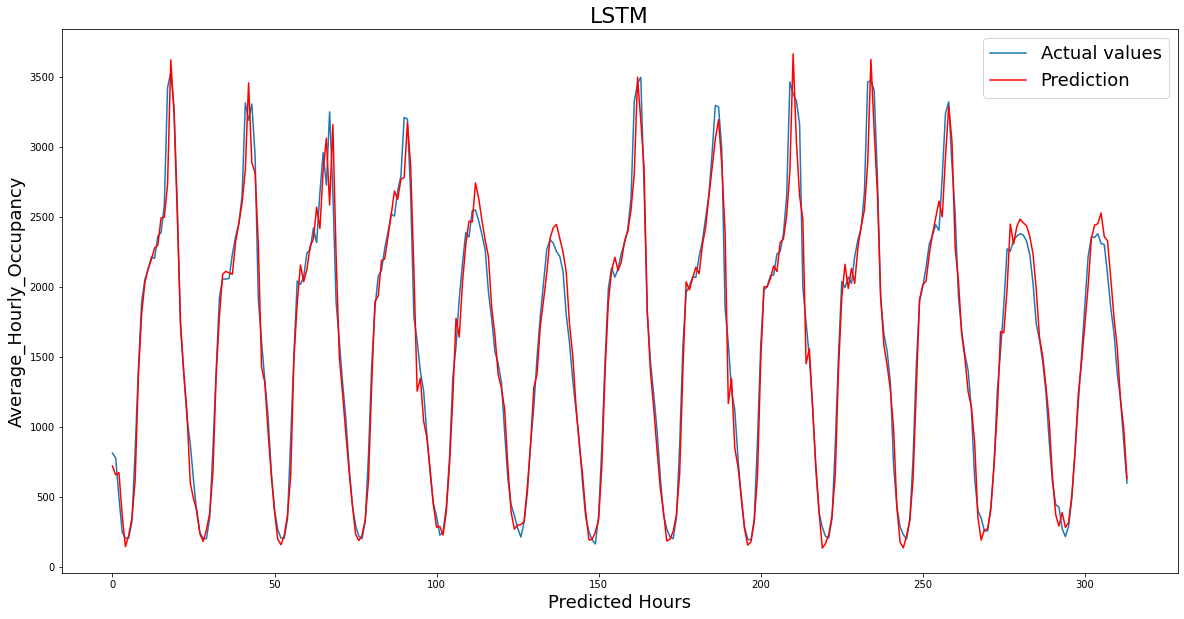

In [64]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds2, 'r',label ='Prediction')
pyplot.legend(fontsize = 18)
plt.xlabel('Predicted Hours', fontsize = 18)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 18)
plt.title('LSTM', fontsize = 22)
pyplot.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


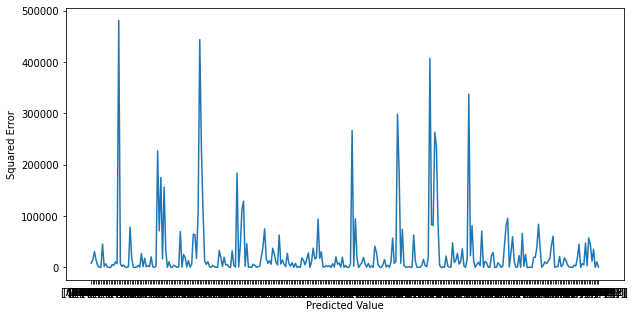

In [65]:
expected = Ytest
# predicted value
predicted =preds2
# calculate errors
errors = list()
for i in range(len(expected)):
    err = (expected[i] - predicted[i])**2
    errors.append(err)
pyplot.figure(figsize=(10,5))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Squared Error')
pyplot.show()

GRU

In [66]:
df_3=HourlyVols.values
df_3=df_3.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_3)

In [67]:
timestep = 5

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 425
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]

In [68]:
Xtest = X[k:,:,:]  
Ytest= Y[k:] 

In [69]:
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,RNN
from tensorflow.keras.optimizers import SGD

In [70]:
 regressorGRU = Sequential()
 regressorGRU.add(GRU(50, activation='relu', input_shape=(5,1)))
 regressorGRU.add(Dense(1))  
regressorGRU.compile(loss='mse', optimizer='adam')
 regressorGRU.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                7950      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [71]:
#regressorGRU.fit(Xtrain, Ytrain, epochs=200, verbose=0) 

In [72]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
patience = 500)

In [73]:

history = regressorGRU.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest) ,epochs = 100,
callbacks = [early_stop])


Epoch 1/100
14/14 [==============================] - 2s 31ms/step - loss: 0.2412 - val_loss: 0.1934
Epoch 2/100
14/14 [==============================] - 0s 15ms/step - loss: 0.1587 - val_loss: 0.1276
Epoch 3/100
14/14 [==============================] - 0s 16ms/step - loss: 0.1074 - val_loss: 0.0947
Epoch 4/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0839 - val_loss: 0.0795
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0708 - val_loss: 0.0667
Epoch 6/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0583 - val_loss: 0.0535
Epoch 7/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0457 - val_loss: 0.0401
Epoch 8/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0335 - val_loss: 0.0278
Epoch 9/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0228 - val_loss: 0.0195
Epoch 10/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0189 - val_loss: 0.0178

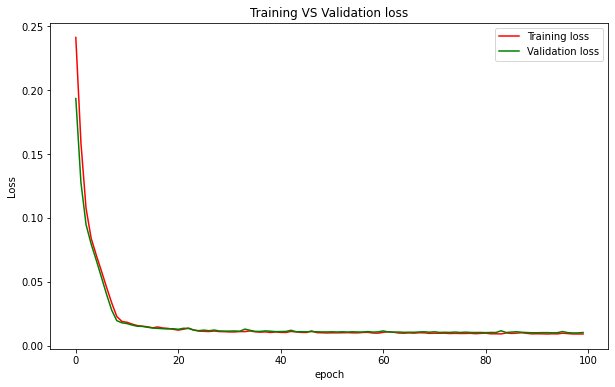

In [74]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'],'r', label='Training loss')
plt.plot(history.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [75]:
Xtest = X[k:,:,:]  
Ytest= Y[k:] 

In [76]:
preds3 = regressorGRU.predict(Xtest)
preds3 = scaler.inverse_transform(preds3)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds3)

29404.701

In [77]:
100-100*mean_squared_error(Ytest,preds3)/np.sum(Ytest)

94.1792233134571

In [78]:
mean_absolute_error(Ytest,preds3)


124.792496

In [79]:
mean_squared_log_error(Ytest,preds3)

0.023800913

In [80]:
mean_absolute_percentage_error(Ytest,preds3)

0.11655062

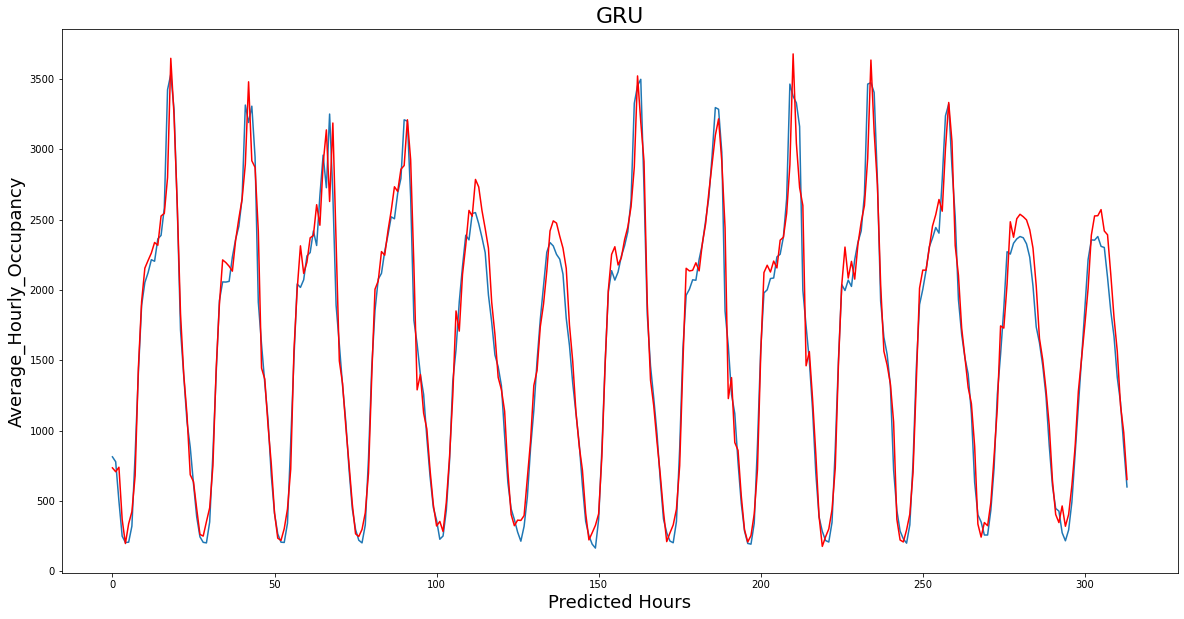

In [81]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds3, 'r',label ='Prediction')
label ='Prediction'
plt.xlabel('Predicted Hours', fontsize = 18)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 18)
plt.title('GRU', fontsize = 22)
pyplot.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


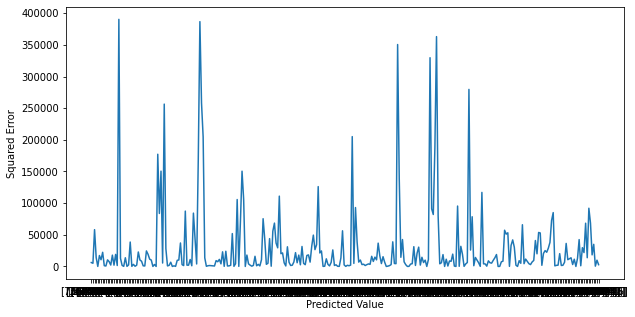

In [82]:
expected = Ytest
# predicted value
predicted =preds3
# calculate errors
errors = list()
for i in range(len(expected)):
    err = (expected[i] - predicted[i])**2
    errors.append(err)
pyplot.figure(figsize=(10,5))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Squared Error')
pyplot.show()

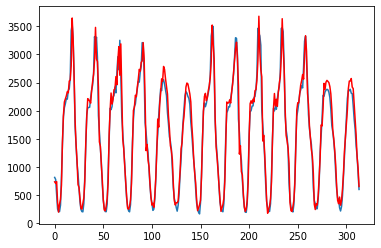

In [83]:
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds3, 'r',label ='Prediction')

Bi-directioal

In [84]:
df_4=HourlyVols.values
df_4=df_4.astype('float32')
scaler = MinMaxScaler(feature_range=(-1,1))
ts = scaler.fit_transform(df_4)

In [85]:
timestep = 6

X= []
Y=[]

raw_data=ts

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 490
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]


In [86]:
Xtest = X[k:,:,:]  
Ytest= Y[k:] 

In [87]:
from keras.layers import Dense, Bidirectional, RepeatVector, TimeDistributed, Flatten,LSTM

In [88]:
model_4 = Sequential()
# Adding a Bidirectional LSTM layer
model_4.add(Bidirectional(LSTM(50,return_sequences=True,activation='relu', dropout=0.5, input_shape=(6,1))))
model_4.add(Bidirectional(LSTM(50, dropout=0.5)))
model_4.add(Dense(1))
model_4.compile(loss='mse', optimizer='adam')

In [89]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
patience =100)


In [90]:
history = model_4.fit(Xtrain, Ytrain,validation_data=(Xtest, Ytest),epochs =500,
callbacks = [early_stop])

Epoch 1/500
16/16 [==============================] - 7s 83ms/step - loss: 0.2551 - val_loss: 0.1832
Epoch 2/500
16/16 [==============================] - 1s 33ms/step - loss: 0.1855 - val_loss: 0.1418
Epoch 3/500
16/16 [==============================] - 1s 32ms/step - loss: 0.1613 - val_loss: 0.1056
Epoch 4/500
16/16 [==============================] - 1s 34ms/step - loss: 0.1371 - val_loss: 0.0752
Epoch 5/500
16/16 [==============================] - 1s 32ms/step - loss: 0.1244 - val_loss: 0.0694
Epoch 6/500
16/16 [==============================] - 1s 33ms/step - loss: 0.1058 - val_loss: 0.0648
Epoch 7/500
16/16 [==============================] - 0s 31ms/step - loss: 0.0886 - val_loss: 0.0573
Epoch 8/500
16/16 [==============================] - 1s 33ms/step - loss: 0.0975 - val_loss: 0.0536
Epoch 9/500
16/16 [==============================] - 0s 31ms/step - loss: 0.0856 - val_loss: 0.0443
Epoch 10/500
16/16 [==============================] - 0s 31ms/step - loss: 0.0914 - val_loss: 0.0638

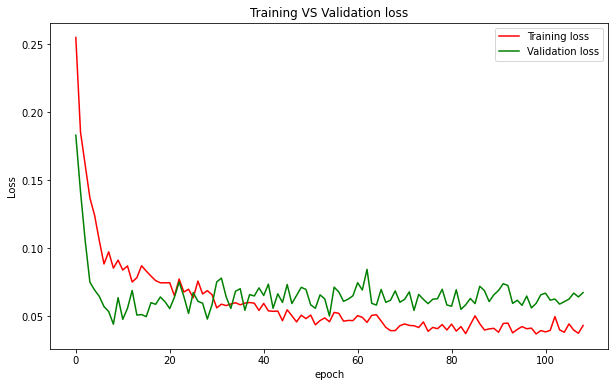

In [91]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'],'r', label='Training loss')
plt.plot(history.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [92]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

preds4 = model_4.predict(Xtest)
preds4 = scaler.inverse_transform(preds4)
Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)
Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds4)

193619.45

In [93]:
100-100*mean_squared_error(Ytest,preds4)/np.sum(Ytest)


51.327927038189664

In [94]:
mean_absolute_error(Ytest,preds4)

362.68988

In [95]:
mean_squared_log_error(Ytest,preds4)

0.18818136

In [96]:
mean_absolute_percentage_error(Ytest,preds4)

0.42427686

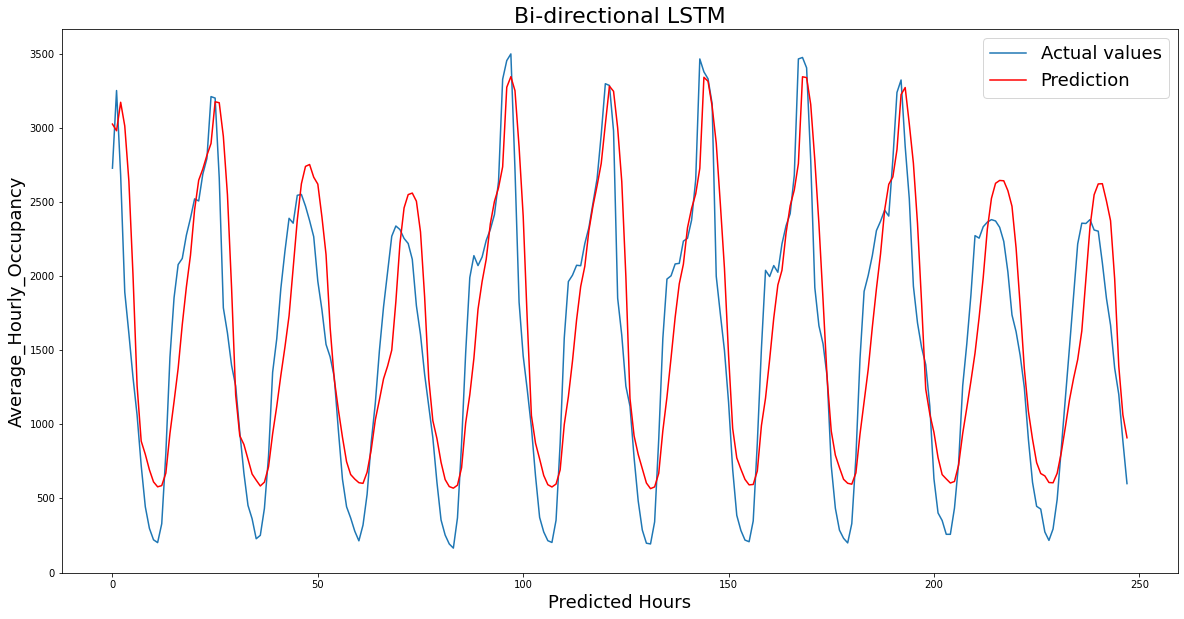

In [97]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,10))
pyplot.plot(Ytest,label ='Actual values')
pyplot.plot(preds4, 'r',label ='Prediction')
pyplot.legend(fontsize = 18)
plt.xlabel('Predicted Hours', fontsize = 18)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 18)
plt.title('Bi-directional LSTM', fontsize = 22)
pyplot.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


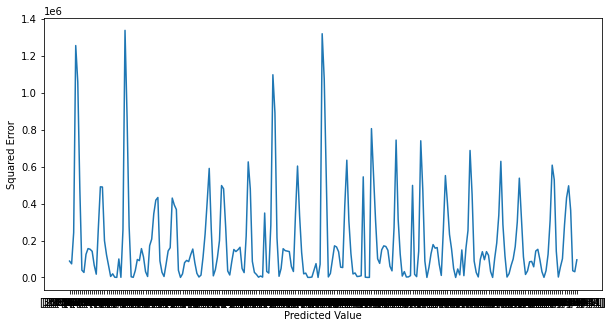

In [98]:
expected = Ytest
# predicted value
predicted =preds4
# calculate errors
errors = list()
for i in range(len(expected)):
    err = (expected[i] - predicted[i])**2
    errors.append(err)
pyplot.figure(figsize=(10,5))
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Squared Error')
pyplot.show()

Comparasion

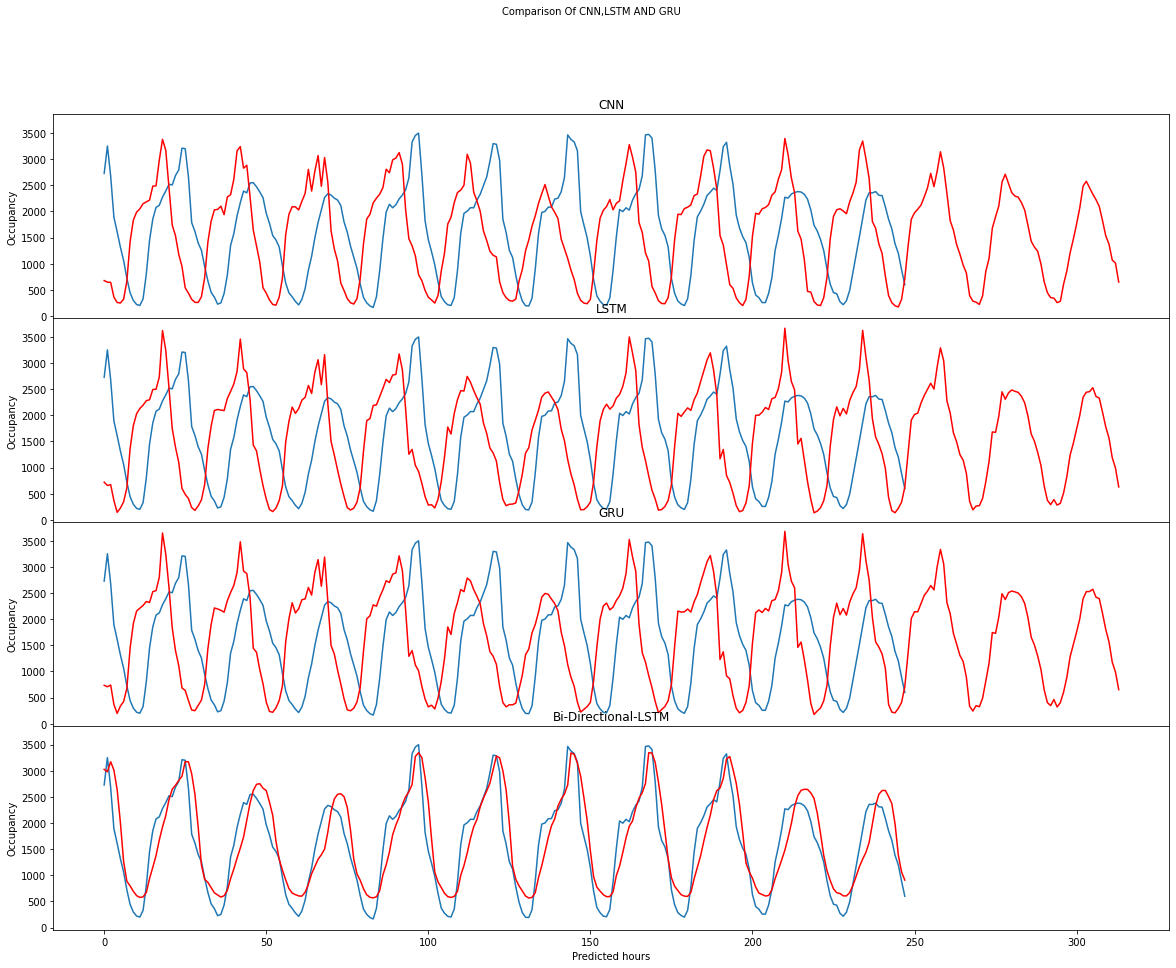

In [99]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Comparison Of CNN,LSTM AND GRU ',fontsize = 10)
axs[0].plot(Ytest,label ='Actual values')
axs[0].plot(preds,"r",label ='Prediction')
axs[0].set_title('CNN')
axs[1].plot(Ytest,label ='Actual values')
axs[1].plot(preds2,"r",label ='Prediction')
axs[1].set_title('LSTM')
axs[2].plot(Ytest,label ='Actual values')
axs[2].plot(preds3,"r",label ='Prediction')
axs[2].set_title('GRU')
axs[3].plot(Ytest,label ='Actual values')
axs[3].plot(preds4,"r",label ='Prediction')
axs[3].set_title('Bi-Directional-LSTM')
for ax in axs.flat:
    ax.set(xlabel='Predicted hours', ylabel='Occupancy')

import matplotlib.pyplot as plt

# Data
x = ["CNN","LSTM", "GRU","Bi-Directional-LSTM"]
y = [mean_squared_error(Ytest,preds), mean_squared_error(Ytest,preds2),mean_squared_error(Ytest,preds3),mean_squared_error(Ytest,preds4)]
labels = ["CNN_mean_squared_error", "LSTM_mean_squared_error", "GRU_mean_squared_error","Bi-Directional-LSTM"]



# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Mean Squared Error Comparison')

# Plot the scatter points
ax.bar(x, y) 

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.show()

import matplotlib.pyplot as plt

# Data
x = ["CNN","LSTM", "GRU","Bi-Directioal_LSMT"]
y = [np.sqrt(mean_squared_error(Ytest,preds)),np.sqrt(mean_squared_error(Ytest,preds2)),np.sqrt(mean_squared_error(Ytest,preds3))]
labels = ["CNN_ROOT_mean_squared_error" ,"LSTM_ROOT_mean_squared_error","LSTM_ROOT_mean_squared_error" ]



# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('CNN_ROOT_mean_squared_error')

# Plot the scatter points
ax.scatter(x, y,
           color="RED",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.show()

import matplotlib.pyplot as plt

# Data
x = ["CNN","LSTM", "GRU"]
y = [mean_absolute_error(Ytest,preds),mean_absolute_error(Ytest,preds2),mean_absolute_error(Ytest,preds3)]
labels = ["CNN_mean_absolute_error" ,"LSTM_mean_absolute_error","GRU_mean_absolute_error"]



# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('mean_absolute_error Comparison')

# Plot the scatter points
ax.scatter(x, y,
           color="RED",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.show()